### $m$-d Chebyshev interpolation simulations.

NOTE: The actual figure is drawn within `figures_cross_md.ipynb` notebook to plot the results together with those of TCI.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tools import merge_pkl, read_field, create_subplots, fit_power_law, fit_exponential

# Force imported libraries and modules to auto-reload
%load_ext autoreload
%autoreload 2

DATA_PATH = "data/"
SHOW_FIGURES = True

In [2]:
# Set parameter ranges
range_m = list(range(1, 10 + 1))
range_m_pb = list(range(1, 4 + 1))
range_t = [10 ** -(exp) for exp in range(1, 14 + 1)]

# Set fixed parameters
fixed_m = 10
fixed_n = 20
max_d = 100
fixed_t = 1e-14

# Load the data with respect to the dimension m
params_m = {"m": range_m, "n": fixed_n, "d": max_d, "t": fixed_t, "order": "A"}
data_m_pa = merge_pkl(params_m, name="chebyshev_md_product", path=DATA_PATH)
data_m_sa = merge_pkl(params_m, name="chebyshev_md_squeezed", path=DATA_PATH)
params_m["order"] = "B"
data_m_sb = merge_pkl(params_m, name="chebyshev_md_squeezed", path=DATA_PATH)
params_m["m"] = range_m_pb
data_m_pb = merge_pkl(params_m, name="chebyshev_md_product", path=DATA_PATH)

params_t = {"m": fixed_m, "n": fixed_n, "d": max_d, "t": range_t, "order": "A"}
data_t_pa = merge_pkl(params_t, name="chebyshev_md_product", path=DATA_PATH)
data_t_sa = merge_pkl(params_t, name="chebyshev_md_squeezed", path=DATA_PATH)
params_t["order"] = "B"
data_t_sb = merge_pkl(params_t, name="chebyshev_md_squeezed", path=DATA_PATH)

In [3]:
from tools import set_plot_parameters, STYLE_FIT_1, STYLE_FIT_2

set_plot_parameters()

# fmt: off
# Styles
STYLE_PRODUCT_A = {"linestyle": "solid", "marker": "o", "color": "tab:blue"}
STYLE_PRODUCT_B = {"linestyle": "solid", "marker": "v", "color": "tab:blue"}

STYLE_SQUEEZED_A = {"linestyle": (0, (1, 1)), "marker": "o", "color": "tab:purple"}
STYLE_SQUEEZED_B = {"linestyle": (0, (1, 1)), "marker": "v", "color": "tab:purple"}

1. Draw the sampled error in norm-$\infty$ for the functions with respect to the dimension $m$.

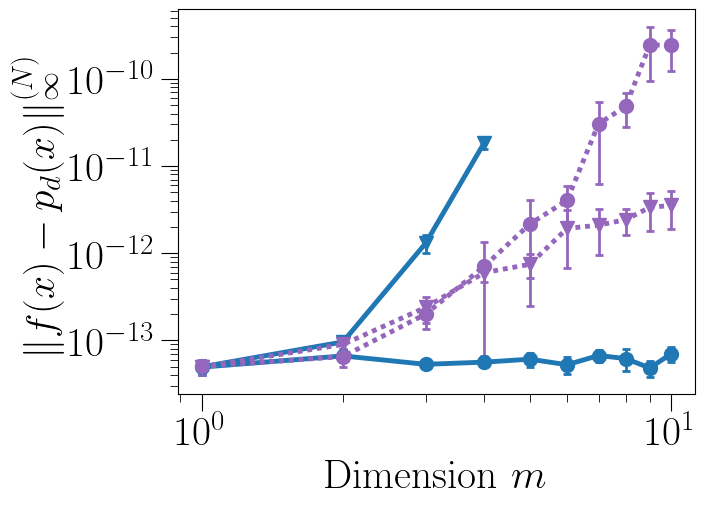

In [4]:
# fmt: off
def plot_norms_m(ax):
    ax.errorbar(range_m, read_field(data_m_pa, "mean_error"), read_field(data_m_pa, "std_error"), elinewidth=2, capsize=3, capthick=2, **STYLE_PRODUCT_A)
    ax.errorbar(range_m_pb, read_field(data_m_pb, "mean_error"), read_field(data_m_pb, "std_error"), elinewidth=2, capsize=3, capthick=2, **STYLE_PRODUCT_B)
    ax.errorbar(range_m, read_field(data_m_sa, "mean_error"), read_field(data_m_sa, "std_error"), elinewidth=2, capsize=3, capthick=2, **STYLE_SQUEEZED_A)
    ax.errorbar(range_m, read_field(data_m_sb, "mean_error"), read_field(data_m_sb, "std_error"), elinewidth=2, capsize=3, capthick=2, **STYLE_SQUEEZED_B)
    ax.set_xscale("log")
    ax.set_yscale("log")

if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_norms_m(ax)
	ax.set_xlabel(r"Dimension $m$")
	ax.set_ylabel(r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")

<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_260735/2386848909.py:8: SyntaxWarning: invalid escape sequence '\e'
  fit_power_law(ax, range_t, read_field(data_t_sb, "mean_error"), label="\epsilon", style=STYLE_FIT_1)


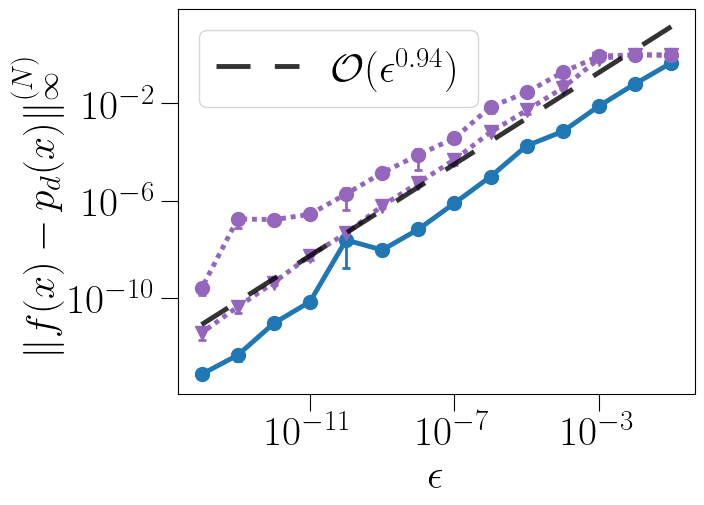

In [5]:
# fmt: off
def plot_norms_t(ax):
    ax.errorbar(range_t, read_field(data_t_pa, "mean_error"), read_field(data_t_pa, "std_error"), elinewidth=2, capsize=3, capthick=2, **STYLE_PRODUCT_A)
    ax.errorbar(range_t, read_field(data_t_sa, "mean_error"), read_field(data_t_sa, "std_error"), elinewidth=2, capsize=3, capthick=2, **STYLE_SQUEEZED_A)
    ax.errorbar(range_t, read_field(data_t_sb, "mean_error"), read_field(data_t_sb, "std_error"), elinewidth=2, capsize=3, capthick=2, **STYLE_SQUEEZED_B)
    ax.set_xscale("log")
    ax.set_yscale("log")
    fit_power_law(ax, range_t, read_field(data_t_sb, "mean_error"), label="\epsilon", style=STYLE_FIT_1)
    ax.legend()


if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_norms_t(ax)
	ax.set_xlabel(r"$\epsilon$")
	ax.set_ylabel(r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$")

2. Draw the maximum bond dimension $\chi_{\mathrm{max}}$ with respect to the dimension $m$.

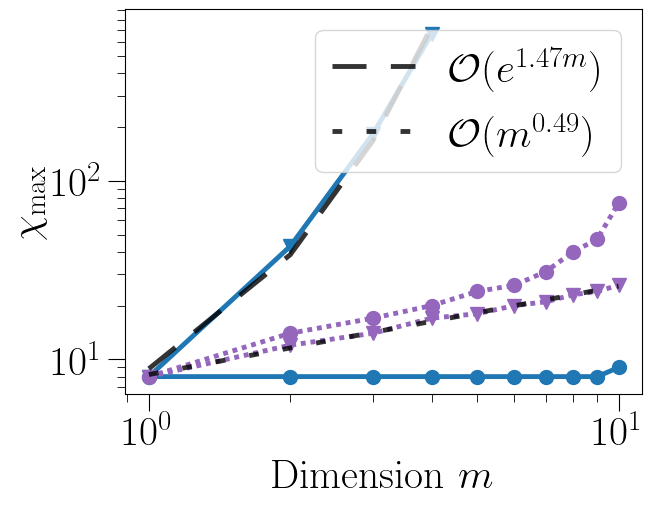

In [6]:
# fmt: off
def plot_bonds_m(ax):
    ax.loglog(range_m, read_field(data_m_pa, "maxbond"), **STYLE_PRODUCT_A)
    ax.loglog(range_m_pb, read_field(data_m_pb, "maxbond"), **STYLE_PRODUCT_B)
    ax.loglog(range_m, read_field(data_m_sa, "maxbond"), **STYLE_SQUEEZED_A)
    ax.loglog(range_m, read_field(data_m_sb, "maxbond"), **STYLE_SQUEEZED_B)
    fit_exponential(ax, range_m_pb, read_field(data_m_pb, "maxbond"), label="m", style=STYLE_FIT_1)
    fit_power_law(ax, range_m, read_field(data_m_sb, "maxbond"), label="m", style=STYLE_FIT_2)
    ax.legend()


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_bonds_m(ax)
    ax.set_xlabel(r"Dimension $m$")
    ax.set_ylabel(r"$\chi_{\mathrm{max}}$")

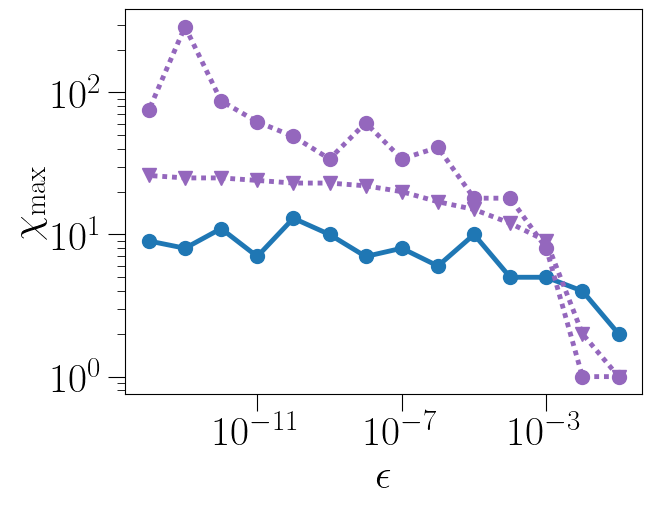

In [7]:
def plot_bonds_t(ax):
    ax.loglog(range_t, read_field(data_t_pa, "maxbond"), **STYLE_PRODUCT_A)
    ax.loglog(range_t, read_field(data_t_sa, "maxbond"), **STYLE_SQUEEZED_A)
    ax.loglog(range_t, read_field(data_t_sb, "maxbond"), **STYLE_SQUEEZED_B)


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_bonds_t(ax)
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel(r"$\chi_{\mathrm{max}}$")

3. Draw the runtime with respect to the dimension $m$.

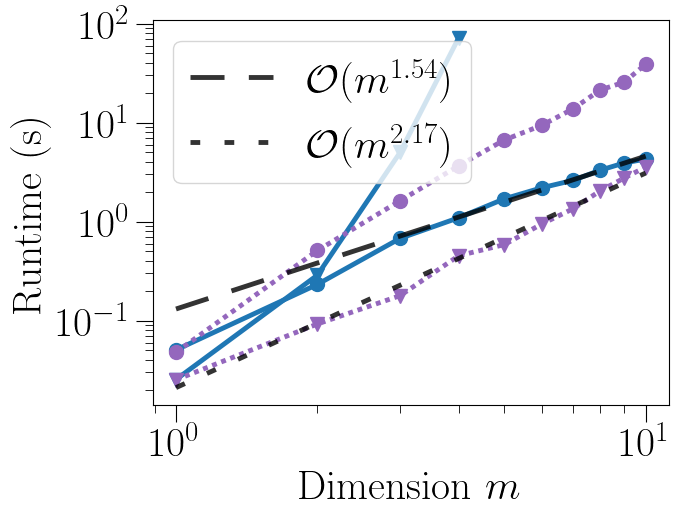

In [8]:
# fmt: off
def plot_times_m(ax):
    ax.loglog(range_m, read_field(data_m_pa, "time"), **STYLE_PRODUCT_A)
    ax.loglog(range_m_pb, read_field(data_m_pb, "time"), **STYLE_PRODUCT_B)
    ax.loglog(range_m, read_field(data_m_sa, "time"), **STYLE_SQUEEZED_A)
    ax.loglog(range_m, read_field(data_m_sb, "time"), **STYLE_SQUEEZED_B)
    fit_power_law(ax, range_m, read_field(data_m_pa, "time"), label="m", fit_range=slice(2, 10), plot_range=slice(None), style=STYLE_FIT_1)
    fit_power_law(ax, range_m, read_field(data_m_sb, "time"), label="m", style=STYLE_FIT_2)
    ax.legend()


if SHOW_FIGURES:
	fig, ax = create_subplots()
	plot_times_m(ax)
	ax.set_xlabel(r"Dimension $m$")
	ax.set_ylabel("Runtime (s)")

<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:6: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_260735/4133981142.py:6: SyntaxWarning: invalid escape sequence '\e'
  fit_power_law(ax, range_t, read_field(data_t_pa, "time"), label="\epsilon", style=STYLE_FIT_1)
/tmp/ipykernel_260735/4133981142.py:7: SyntaxWarning: invalid escape sequence '\e'
  fit_power_law(ax, range_t, read_field(data_t_sb, "time"), label="\epsilon", fit_range=slice(1,15), style=STYLE_FIT_2)


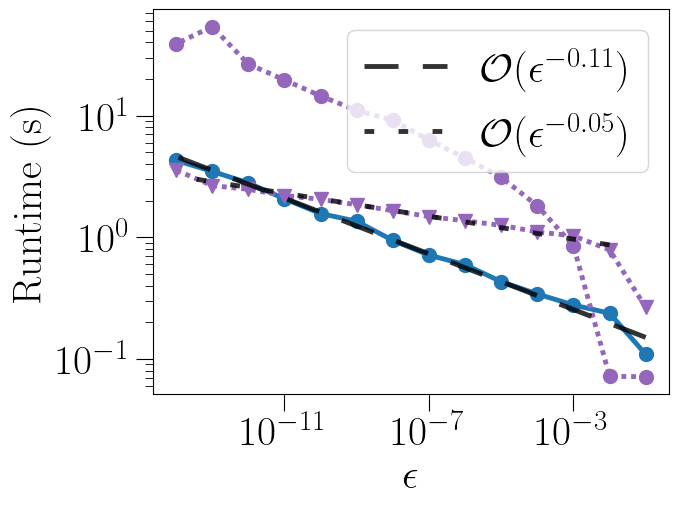

In [9]:
# fmt: off
def plot_times_t(ax):
    ax.loglog(range_t, read_field(data_t_pa, "time"), **STYLE_PRODUCT_A)
    ax.loglog(range_t, read_field(data_t_sa, "time"), **STYLE_SQUEEZED_A)
    ax.loglog(range_t, read_field(data_t_sb, "time"), **STYLE_SQUEEZED_B)
    fit_power_law(ax, range_t, read_field(data_t_pa, "time"), label="\epsilon", style=STYLE_FIT_1)
    fit_power_law(ax, range_t, read_field(data_t_sb, "time"), label="\epsilon", fit_range=slice(1,15), style=STYLE_FIT_2)
    ax.legend()


if SHOW_FIGURES:
    fig, ax = create_subplots()
    plot_times_t(ax)
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel("Runtime (s)")

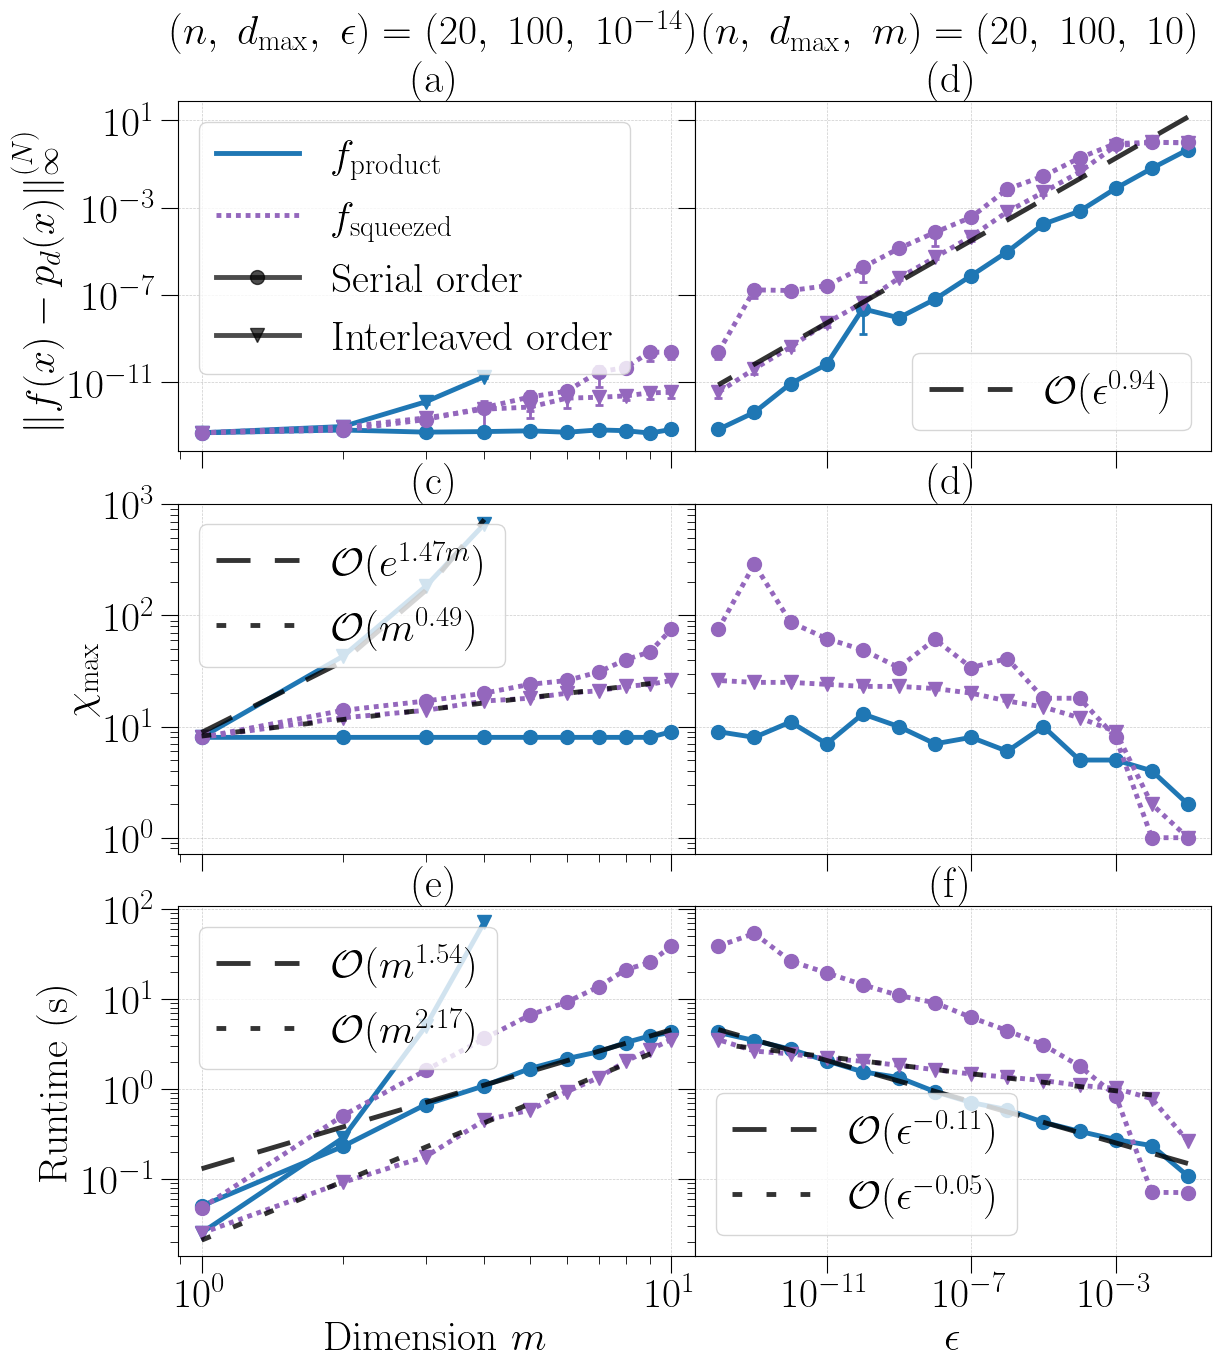

In [10]:
# fmt: off
from matplotlib import ticker
fig, axs = create_subplots(3, 2, sharex='col', sharey='row')

plot_norms_m(axs[0, 0])
plot_bonds_m(axs[1, 0])
plot_times_m(axs[2, 0])
plot_norms_t(axs[0, 1])
plot_bonds_t(axs[1, 1])
plot_times_t(axs[2, 1])

column_labels = [r"Dimension $m$", r"$\epsilon$"]
for ax, col in zip(axs[2], column_labels):
    ax.set_xlabel(col)

row_labels = [
    r"$\Vert f(x) - p_d(x)\Vert^{(N)}_{\infty}$",
    r"$\chi_{\mathrm{max}}$",
    "Runtime (s)",
]
for ax, row in zip(axs[:, 0], row_labels):
    ax.set_ylabel(row)

for i, ax in enumerate(axs.flat):
    ax.set_title(f"(" + chr(ord("a") + i) + ")")
    ax.grid(which="major")
    ax.xaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))
    ax.yaxis.set_minor_locator(ticker.LogLocator(numticks=999, subs="auto"))

axs[0, 0].set_title(
    r"$(n, \ d_{\mathrm{max}}, \ \epsilon) = (20, \ 100, \ 10^{-14})$" + "\n (a)"
)
axs[0, 1].set_title(r"$(n, \ d_{\mathrm{max}}, \ m) = (20, \ 100, \ 10)$" + "\n (d)")

line_prod = plt.Line2D([], [], color="tab:blue", linestyle="solid")
line_sqz = plt.Line2D([], [], color="tab:purple", linestyle=(0, (1, 1)))
line_serial = plt.Line2D([], [], color="k", marker="o", alpha=0.7)
line_interleaved = plt.Line2D([], [], color="k", marker="v", alpha=0.7)

lines = [line_prod, line_sqz, line_serial, line_interleaved]
labels = [
    r"$f_{\mathrm{product}}$",
    r"$f_{\mathrm{squeezed}}$",
    "Serial order",
    "Interleaved order",
]
axs[0, 0].legend(lines, labels)

fig.subplots_adjust(hspace=0.15, wspace=0.0)
# plt.savefig("figures/chebyshev_md.pdf", dpi=300, bbox_inches="tight")